In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_dir = "data/" # Define data path

In [180]:
df = pd.read_csv(data_dir + "food_crises_cleaned.csv") # Read data into DataFrame
df["date"] = pd.to_datetime(df["year_month"], format="%Y_%m") # Create date column
print(len(df['district'].unique()))
df.set_index(["date", "district"], inplace=True) # Set index

78


In [181]:
for i in range(0,78):
    idx_min = 36+i*158 
    idx_max = 156+i*158   
    df_district = df[idx_min:idx_max] #only years 2010-2019
    df_ndvi_lag = df_district[['ipc','ndvi_mean']].copy()
    district = df_ndvi_lag.index.droplevel('date')[0]
    print(district)
    df_ndvi_lag['ndvi_Lag4'] = df_ndvi_lag['ndvi_mean'].shift(4)
    df_ndvi_lag = df_ndvi_lag.dropna().droplevel('district')

    # Split the data into features (X) and target variable (y)
    X = df_ndvi_lag[['ndvi_Lag4']]  # Add other relevant features
    y = df_ndvi_lag['ipc']  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    new_data = pd.DataFrame({'ndvi_Lag4': [0.5]})
    predicted_ipc = model.predict(new_data)
    print(f"Predicted IPC level: {predicted_ipc[0]}")

Bor
Mean Squared Error: 0.2250248137063959
Predicted IPC level: 2.0664388172027692
Jur River
Mean Squared Error: 0.7364560665847646
Predicted IPC level: 1.9815743801981267
Aweil North
Mean Squared Error: 0.5279369075193527
Predicted IPC level: 2.3594605083789184
Morobo
Mean Squared Error: 0.8306100780384791
Predicted IPC level: 1.513562283031208
Magwi
Mean Squared Error: 1.2371502938186774
Predicted IPC level: 1.7041332402879545
Kajo Keji
Mean Squared Error: 0.8132702396440445
Predicted IPC level: 1.612055312094908
Ikotos
Mean Squared Error: 0.7822672151061258
Predicted IPC level: 1.9216346050419368
Yei
Mean Squared Error: 1.6305224586331908
Predicted IPC level: 1.7125036802153946
Yambio
Mean Squared Error: 0.5598747799448719
Predicted IPC level: 1.6602859244109411
Ibba
Mean Squared Error: 0.29893198944363225
Predicted IPC level: 1.4074220107059423
Lainya
Mean Squared Error: 2.1237607716751934
Predicted IPC level: 1.6998636160966554
Maridi
Mean Squared Error: 0.3201417071409706
Predict

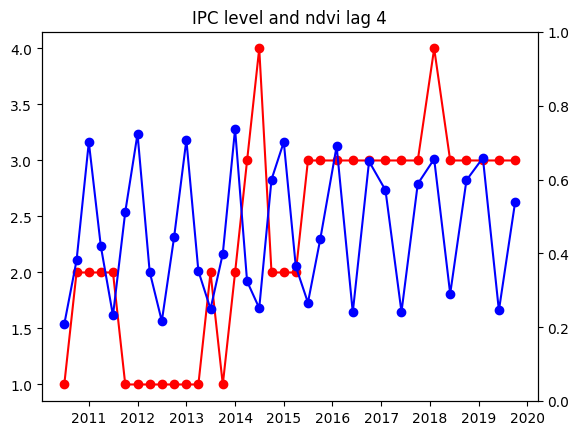

In [182]:
plt.plot(df_ndvi_lag.index, df_ndvi_lag['ipc'],label = 'IPC', marker='o',c='red')
plt2 = plt.gca().twinx()
plt2.plot(df_ndvi_lag.index, df_ndvi_lag['ndvi_Lag4'], label='ndvi', color='blue', marker='o')

# define Limits
plt.ylim(1,5)
plt2.set_ylim(0,1)

# Title for the plot
plt.title('IPC level and ndvi lag 4');